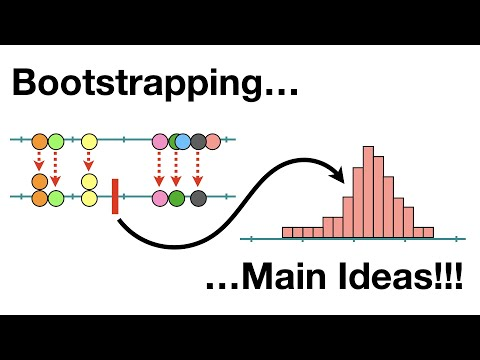

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)


# 1

The difference between standard error of the mean and the standard deviation is that the standard deviation is the measurment of individual data points from the mean of the data. 
The standard error of the mean measures the precision of the estimated data means from a sample
the greater the sample size the less standard error of the mean is
in the contect of bootstrapping, the standard deviation of the bootstrapped means distribution is bascilly the standard error of mean


# 2

To create a 95% confidence interval, we first need to calculate the sample mean from the bootstrapped data. 
Then calculate the standard error of means by dividing the standard deviation of the sample by the square root of the sample size. 
Then we find the critical value for the 95% confidence interval, this can be find using a normal distribution if we have a decent size sample size (n>30) or use the t distributon with degrees of freedom with smaller samples. 
At last, we calculate the 95% confidence interval by + or - the product of the critical value and the standard error of means. 
In case of a normal distribution, the 95% confidence interval can be calculated by + or - 1.96 SEM 


chatbot summary:
Here’s a summary of our discussion:

Standard Error of the Mean (SEM) vs. Standard Deviation (SD):

SD measures the variability of individual data points in a dataset, while SEM quantifies the precision of the sample mean as an estimate of the population mean.
SEM is always smaller than SD (except in very small samples) and decreases as sample size increases.
Using SEM to Create a 95% Confidence Interval:

To calculate a 95% confidence interval using SEM, follow these steps:
Calculate the sample mean.
Calculate SEM using 
𝑆
𝐸
𝑀
=
𝑆
𝐷
𝑛
SEM= 
n
​
 
SD
​
 .
Use a critical value (Z = 1.96 for large samples or a t-value for smaller samples).
The confidence interval is given by 
𝐶
𝐼
=
𝑥
ˉ
±
(
𝑍
×
𝑆
𝐸
𝑀
)
CI= 
x
ˉ
 ±(Z×SEM).
This confidence interval will cover 95% of the bootstrapped sample means. Alternatively, using the empirical bootstrapped sample distribution, you can directly take the 2.5th and 97.5th percentiles for the interval.

https://chatgpt.com/share/66ff0fbf-00ec-8010-9f76-bee315c84413


# 6

1. What is the process of bootstrapping?

Bootstrapping is when you take a sample of data with size n and perform sampling with replacement with that sample, for every bootstrapped sample, you will take exactly n data points from the sample, since you are sampling it with replacement, you will get slightly different result every time. You take do some sort of calculation or measurement with the bootstrapped sample you just got, that could be something like mean, medium or standard deivation. Then you put that measurement into a histogram. You will repeat this many many times until you get a histogram which you can use to do more analysis. 

2. What is the main purpose of bootstrapping?

Bootstrapping is a great way to estimate the distribution of a population from a sample when traidtional methods might not be the best idea. Bootstrapping can be used to estimate the confidence interval and test your hypothesis

3. If you had a (hypothesized) guess about what the average of a population was, and you had a sample of size n from that population, how could you use bootstrapping to assess whether or not your (hypothesized) guess might be plausible?

I would first calculate the mean of the sample and then resample with bootstrapping. Then I would use the bootstrapped mean to create a histogram to show distribution. I would create a 95% confidence interval based on the bootstrapped distribution. If my hgypothesized guess fall with in the 95% confidence interval, i would say the guess is plausible and not plausible if it falls outside of the 95% confidene interval

# 8 

A null hypothesis of "no " effect in this case is that the vaccine had no effect on average

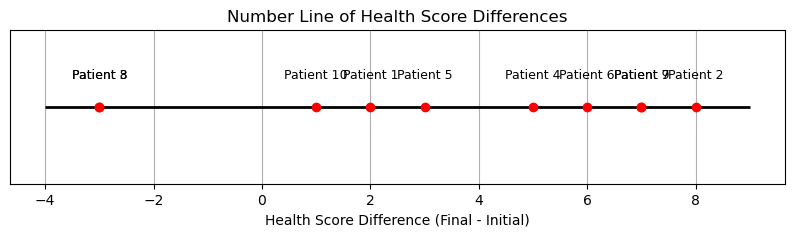

In [4]:

import pandas as pd
import matplotlib.pyplot as plt

data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Converting to a DataFrame
df = pd.DataFrame(data)
# Calculating the difference between Initial and Final Health Scores
df['HealthScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Creating the number line
plt.figure(figsize=(10, 2))

# Plotting points for each patient's health score difference on a number line
plt.hlines(1, min(df['HealthScoreDifference']) - 1, max(df['HealthScoreDifference']) + 1, colors='black', linewidth=2)
plt.scatter(df['HealthScoreDifference'], [1]*len(df), color='red', zorder=5)

# Annotating points with Patient ID
for i, patient_id in enumerate(df['PatientID']):
    plt.text(df['HealthScoreDifference'][i], 1.02, f'Patient {patient_id}', ha='center', fontsize=9)

# Customizing the plot
plt.title('Number Line of Health Score Differences')
plt.xlabel('Health Score Difference (Final - Initial)')
plt.yticks([])
plt.grid(True, axis='x')

plt.show()


Here I dicided to use bootstrapping to create a distribution of bootstrapped means to create a confidence interval

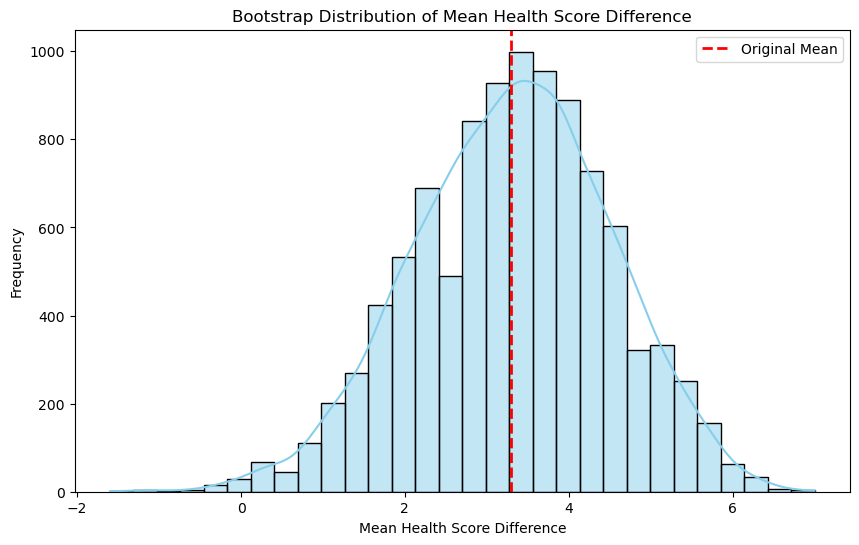

In [13]:
import numpy as np
import seaborn as sns

# Number of bootstrap samples
n_iterations = 10000
bootstrap_means = []

np.random.seed(42)

# Bootstrapping
for _ in range(n_iterations):
    sample = np.random.choice(df['HealthScoreDifference'], size=len(df), replace=True)
    bootstrap_means.append(np.mean(sample))

# Plotting the distribution of bootstrap means
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_means, bins=30, kde=True, color='skyblue')
plt.title('Bootstrap Distribution of Mean Health Score Difference')
plt.xlabel('Mean Health Score Difference')
plt.ylabel('Frequency')
plt.axvline(np.mean(df['HealthScoreDifference']), color='red', linestyle='dashed', linewidth=2, label='Original Mean')
plt.legend()
plt.show()

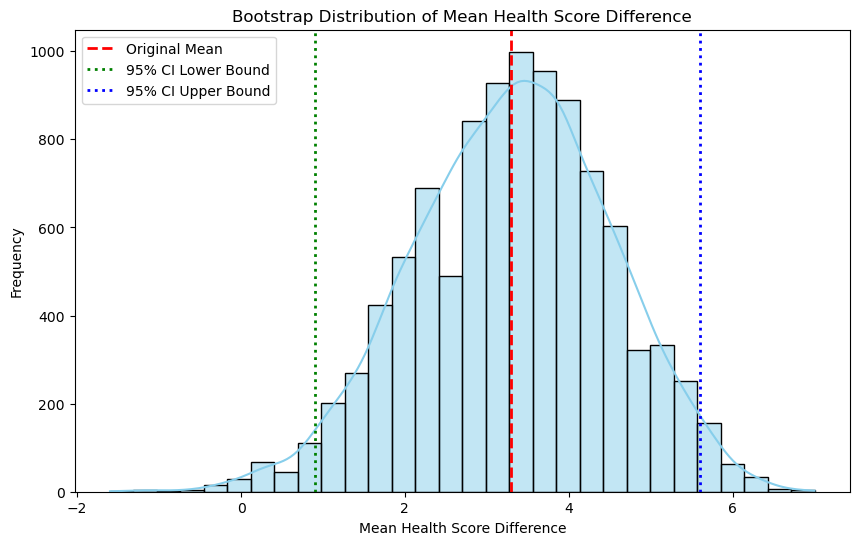

95% Confidence Interval: [0.90, 5.60]


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Creating the dataset
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

# Converting to a DataFrame
df = pd.DataFrame(data)

# Calculating the difference between Initial and Final Health Scores
df['HealthScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Number of bootstrap samples
n_iterations = 10000
bootstrap_means = []
np.random.seed(42)


# Bootstrapping
for _ in range(n_iterations):
    sample = np.random.choice(df['HealthScoreDifference'], size=len(df), replace=True)
    bootstrap_means.append(np.mean(sample))

# Calculating the 95% confidence interval
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

# Plotting the distribution of bootstrap means
plt.figure(figsize=(10, 6))
sns.histplot(bootstrap_means, bins=30, kde=True, color='skyblue')
plt.title('Bootstrap Distribution of Mean Health Score Difference')
plt.xlabel('Mean Health Score Difference')
plt.ylabel('Frequency')

# Marking the original mean and confidence interval
plt.axvline(np.mean(df['HealthScoreDifference']), color='red', linestyle='dashed', linewidth=2, label='Original Mean')
plt.axvline(lower_bound, color='green', linestyle='dotted', linewidth=2, label='95% CI Lower Bound')
plt.axvline(upper_bound, color='blue', linestyle='dotted', linewidth=2, label='95% CI Upper Bound')

plt.legend()
plt.show()

# Displaying the confidence interval
print(f"95% Confidence Interval: [{lower_bound:.2f}, {upper_bound:.2f}]")

from looking at the bootstrapped distribution, I beleive the null hypothesis can be rejected since it falls outside of the 95% confidence interval

ChatGPT summary 
Sure! Here’s a summary of our conversation:

Dataset Visualization: You provided a dataset containing health scores for patients and requested a visualization comparing the Initial and Final Health Scores by age. I generated a line plot for this.

Number Line Visualization: You asked for a number line to plot the differences between the Initial and Final Health Scores. I created a number line visualization with annotations for each patient.

Python Code Sharing: I provided the Python code used for both visualizations and mentioned the necessary libraries for execution.

Null Hypothesis Explanation: You inquired about the meaning of a null hypothesis of "no effect" in the context of the dataset. I explained how it serves as a baseline assumption in hypothesis testing.

Bootstrapping: You requested bootstrapping to create a distribution for the mean health score differences. I provided the code to perform bootstrapping and visualize the distribution of means.

Confidence Interval: You also asked to create a 95% confidence interval for the bootstrapped means. I modified the code to include this calculation and added the relevant visualizations.

Random Seed: Lastly, you requested to replace random sampling with np.random.seed() for reproducibility in the bootstrapping process. I provided the updated code with the seed included.

If you need any more information or further assistance, just let me know!

link: https://chatgpt.com/share/66ff1a48-374c-8010-9152-ce53214c6fdd